# <span style="color:#bcff8f"> Week 10 Assignment</span>

<span style="font-size:12pt;color:gray;font-weight:bold"> Patrick Weatherford</span><br>

<span style="font-size:16pt">Time Series Analysis</span>

***
http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

***

<br>

In [2]:
import os

# changing working directory to ThinkStats2/code folder
path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University\\DSC 530 - Data Exploration and Analysis\\ThinkStats2\\code'
os.chdir(path)

from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

## Time series analysis

Load the data from "Price of Weed".

In [3]:
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


The following function takes a DataFrame of transactions and compute daily averages.

In [4]:
def GroupByDay(transactions, func=np.mean):
    """Groups transactions by day and compute the daily mean ppg.

    transactions: DataFrame of transactions

    returns: DataFrame of daily prices
    """
    grouped = transactions[['date', 'ppg']].groupby('date')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year

    return daily

The following function returns a map from quality name to a DataFrame of daily averages.

In [5]:
def GroupByQualityAndDay(transactions):
    """Divides transactions by quality and computes mean daily price.

    transaction: DataFrame of transactions
    
    returns: map from quality to time series of ppg
    """
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies

`dailies` is the map from quality name to DataFrame.

In [36]:
dailies = GroupByQualityAndDay(transactions)

dailies

{'high':                   ppg       date     years
 date                                      
 2010-09-02  13.384186 2010-09-02  0.000000
 2010-09-03  14.459588 2010-09-03  0.002738
 2010-09-04  14.923333 2010-09-04  0.005476
 2010-09-05  16.667500 2010-09-05  0.008214
 2010-09-06  15.537500 2010-09-06  0.010952
 ...               ...        ...       ...
 2014-05-09  11.468298 2014-05-09  3.682485
 2014-05-10  10.532326 2014-05-10  3.685223
 2014-05-11  11.518750 2014-05-11  3.687961
 2014-05-12  10.578293 2014-05-12  3.690699
 2014-05-13   9.604615 2014-05-13  3.693437
 
 [1241 rows x 3 columns],
 'low':                   ppg       date     years
 date                                      
 2010-09-02   4.943750 2010-09-02  0.000000
 2010-09-03   3.984138 2010-09-03  0.002738
 2010-09-04   3.530000 2010-09-04  0.005476
 2010-09-10   4.240000 2010-09-10  0.021903
 2010-09-14   6.066118 2010-09-14  0.032855
 ...               ...        ...       ...
 2014-05-09  14.700000 2014-05-09

The following plots the daily average price for each quality.

C:\Users\patwea\OneDrive - Bellevue University\Bellevue_University\DSC 530 - Data Exploration and Analysis\ThinkStats2\code\thinkplot.py:182: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  return plt.subplot(rows, cols, plot_number, **options)


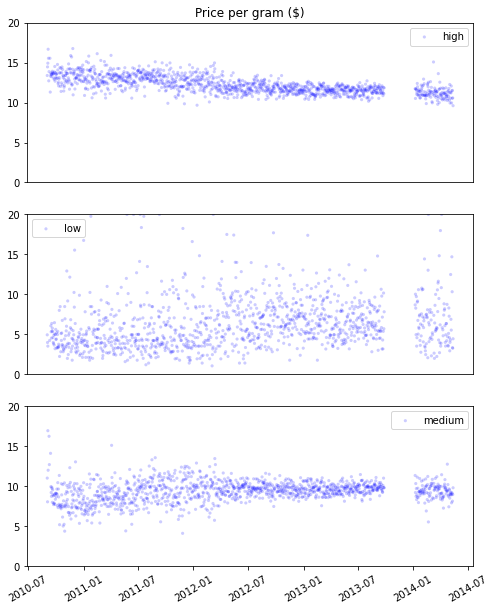

In [7]:
import matplotlib.pyplot as plt

thinkplot.PrePlot(rows=3)
for i, (name, daily) in enumerate(dailies.items()):
    thinkplot.SubPlot(i+1)
    title = 'Price per gram ($)' if i == 0 else ''
    thinkplot.Config(ylim=[0, 20], title=title)
    thinkplot.Scatter(daily.ppg, s=10, label=name)
    if i == 2: 
        plt.xticks(rotation=30)
        thinkplot.Config()
    else:
        thinkplot.Config(xticks=[])

We can use `statsmodels` to run a linear model of price as a function of time.

In [8]:
import statsmodels.formula.api as smf

def RunLinearModel(daily):
    model = smf.ols('ppg ~ years', data=daily)
    results = model.fit()
    return model, results

Here's what the results look like.

In [9]:
from IPython.display import display

for name, daily in dailies.items():
    model, results = RunLinearModel(daily)
    print(name)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     989.7
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          3.69e-160
Time:                        22:33:41   Log-Likelihood:                -1510.1
No. Observations:                1241   AIC:                             3024.
Df Residuals:                    1239   BIC:                             3035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4496      0.045    296.080      0.000      13.361      13.539
years         -0.7082      0.023    -31.460      0.000      -0.752      -0.664
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.992
Skew:                           0.252   Prob(JB):                     9.76e-29
Kurtosis:                       4.497   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     35.90
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           2.76e-09
Time:                        22:33:41   Log-Likelihood:                -3091.3
No. Observations:                1179   AIC:                             6187.
Df Residuals:                    1177   BIC:                             6197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3616      0.194     27.671      0.000       4.981       5.742
years          0.5683      0.095      5.991      0.000       0.382       0.754
==============================================================================
Omnibus:                      649.338   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6347.614
Skew:                           2.373   Prob(JB):                         0.00
Kurtosis:                      13.329   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     64.92
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.82e-15
Time:                        22:33:41   Log-Likelihood:                -2053.9
No. Observations:                1238   AIC:                             4112.
Df Residuals:                    1236   BIC:                             4122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8791      0.071    125.043      0.000       8.740       9.018
years          0.2832      0.035      8.057      0.000       0.214       0.352
==============================================================================
Omnibus:                      133.025   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.863
Skew:                           0.385   Prob(JB):                    1.02e-137
Kurtosis:                       6.411   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's plot the fitted model with the data.

In [10]:
def PlotFittedValues(model, results, label=''):
    """Plots original data and fitted values.

    model: StatsModel model object
    results: StatsModel results object
    """
    years = model.exog[:,1]
    values = model.endog
    thinkplot.Scatter(years, values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label='model', color='#ff7f00')

The following function plots the original data and the fitted curve.

In [11]:
def PlotLinearModel(daily, name):
    """Plots a linear fit to a sequence of prices, and the residuals.
    
    daily: DataFrame of daily prices
    name: string
    """
    model, results = RunLinearModel(daily)
    PlotFittedValues(model, results, label=name)
    thinkplot.Config(title='Fitted values',
                     xlabel='Years',
                     xlim=[-0.1, 3.8],
                     ylabel='Price per gram ($)')

Here are results for the high quality category:

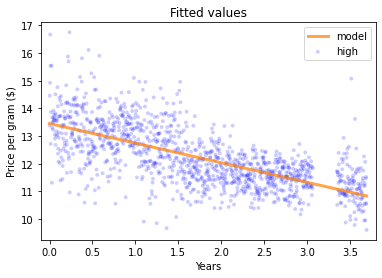

In [12]:
name = 'high'
daily = dailies[name]

PlotLinearModel(daily, name)

## Moving averages

As a simple example, I'll show the rolling average of the numbers from 1 to 10.

In [13]:
array = np.arange(10)

With a "window" of size 3, we get the average of the previous 3 elements, or nan when there are fewer than 3.

In [14]:
# It looks like this doesn't exist in recent versions of Pandas

# pd.rolling_mean(array, 3)

In [15]:
# But Series now provides `rolling`

series = pd.Series(array)
series.rolling(3).mean()

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    8.0
dtype: float64

The following function plots the rolling mean.

In [20]:
def PlotRollingMean(daily, name):
    """Plots rolling mean.

    daily: DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)

    thinkplot.Scatter(reindexed.ppg, s=15, alpha=0.2, label=name)
    roll_mean = reindexed.ppg.rolling(window=30).mean()
    thinkplot.Plot(roll_mean, label='rolling mean', color='#ff7f00')
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel='price per gram ($)')

Here's what it looks like for the high quality category.

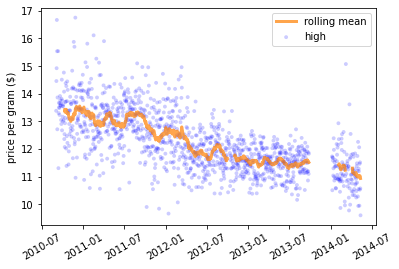

In [21]:
PlotRollingMean(daily, name)

The exponentially-weighted moving average gives more weight to more recent points.

In [35]:
def PlotEWMA(daily, name):
    """Plots rolling mean.

    daily: DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)

    thinkplot.Scatter(reindexed.ppg, s=15, alpha=0.2, label=name)
    roll_mean = reindexed.ppg.ewm(span=30, adjust=False).mean()
    thinkplot.Plot(roll_mean, label='EWMA', color='#ff7f00')
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel='price per gram ($)')

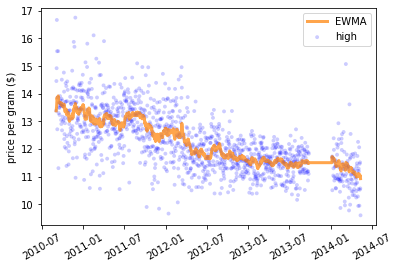

In [32]:
PlotEWMA(daily, name)

We can use resampling to generate missing values with the right amount of noise.

In [33]:
def FillMissing(daily, span=30):
    """Fills missing values with an exponentially weighted moving average.

    Resulting DataFrame has new columns 'ewma' and 'resid'.

    daily: DataFrame of daily prices
    span: window size (sort of) passed to ewma

    returns: new DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)

    ewma = reindexed.ppg.ewm(span=span, adjust=False).mean()

    resid = (reindexed.ppg - ewma).dropna()
    fake_data = ewma + thinkstats2.Resample(resid, len(reindexed))
    reindexed.ppg.fillna(fake_data, inplace=True)

    reindexed['ewma'] = ewma
    reindexed['resid'] = reindexed.ppg - ewma
    return reindexed

In [34]:
def PlotFilled(daily, name):
    """Plots the EWMA and filled data.

    daily: DataFrame of daily prices
    """
    filled = FillMissing(daily, span=30)
    thinkplot.Scatter(filled.ppg, s=15, alpha=0.2, label=name)
    thinkplot.Plot(filled.ewma, label='EWMA', color='#ff7f00')
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel='Price per gram ($)')

Here's what the EWMA model looks like with missing values filled.

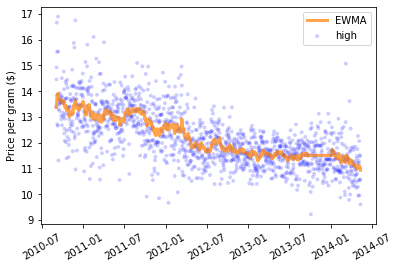

In [30]:
PlotFilled(daily, name)

## Serial correlation

The following function computes serial correlation with the given lag.

In [37]:
def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = thinkstats2.Corr(xs, ys)
    return corr

Before computing correlations, we'll fill missing values.

In [38]:
filled_dailies = {}
for name, daily in dailies.items():
    filled_dailies[name] = FillMissing(daily, span=30)

Here are the serial correlations for raw price data.

In [39]:
for name, filled in filled_dailies.items():            
    corr = thinkstats2.SerialCorr(filled.ppg, lag=1)
    print(name, corr)

high 0.483133941574112
low 0.1036391472288278
medium 0.1604568481798581


It's not surprising that there are correlations between consecutive days, because there are obvious trends in the data.

It is more interested to see whether there are still correlations after we subtract away the trends.

In [40]:
for name, filled in filled_dailies.items():            
    corr = thinkstats2.SerialCorr(filled.resid, lag=1)
    print(name, corr)

high -0.011659184691941207
low 0.039473375813734585
medium 0.0027341336715630883


Even if the correlations between consecutive days are weak, there might be correlations across intervals of one week, one month, or one year.

In [41]:
rows = []
for lag in [1, 7, 30, 365]:
    print(lag, end='\t')
    for name, filled in filled_dailies.items():            
        corr = SerialCorr(filled.resid, lag)
        print('%.2g' % corr, end='\t')
    print()

1	-0.012	0.039	0.0027	
7	0.016	-0.013	-0.019	
30	0.013	-0.011	-0.0058	
365	0.057	0.034	0.012	


The strongest correlation is a weekly cycle in the medium quality category.

## Autocorrelation

The autocorrelation function is the serial correlation computed for all lags.

We can use it to replicate the results from the previous section.

In [42]:
import statsmodels.tsa.stattools as smtsa

filled = filled_dailies['high']
acf = smtsa.acf(filled.resid, nlags=365, unbiased=True)
print('%0.2g, %.2g, %0.2g, %0.2g, %0.2g' % 
      (acf[0], acf[1], acf[7], acf[30], acf[365]))

1, -0.012, 0.016, 0.012, 0.055


To get a sense of how much autocorrelation we should expect by chance, we can resample the data (which eliminates any actual autocorrelation) and compute the ACF.

In [43]:
def SimulateAutocorrelation(daily, iters=1001, nlags=40):
    """Resample residuals, compute autocorrelation, and plot percentiles.

    daily: DataFrame
    iters: number of simulations to run
    nlags: maximum lags to compute autocorrelation
    """
    # run simulations
    t = []
    for _ in range(iters):
        filled = FillMissing(daily, span=30)
        resid = thinkstats2.Resample(filled.resid)
        acf = smtsa.acf(resid, nlags=nlags, unbiased=True)[1:]
        t.append(np.abs(acf))

    high = thinkstats2.PercentileRows(t, [97.5])[0]
    low = -high
    lags = range(1, nlags+1)
    thinkplot.FillBetween(lags, low, high, alpha=0.2, color='gray')

The following function plots the actual autocorrelation for lags up to 40 days.

The flag `add_weekly` indicates whether we should add a simulated weekly cycle.

In [44]:
def PlotAutoCorrelation(dailies, nlags=40, add_weekly=False):
    """Plots autocorrelation functions.

    dailies: map from category name to DataFrame of daily prices
    nlags: number of lags to compute
    add_weekly: boolean, whether to add a simulated weekly pattern
    """
    thinkplot.PrePlot(3)
    daily = dailies['high']
    SimulateAutocorrelation(daily)

    for name, daily in dailies.items():

        if add_weekly:
            daily = AddWeeklySeasonality(daily)

        filled = FillMissing(daily, span=30)

        acf = smtsa.acf(filled.resid, nlags=nlags, unbiased=True)
        lags = np.arange(len(acf))
        thinkplot.Plot(lags[1:], acf[1:], label=name)

To show what a strong weekly cycle would look like, we have the option of adding a price increase of 1-2 dollars on Friday and Saturdays.

In [45]:
def AddWeeklySeasonality(daily):
    """Adds a weekly pattern.

    daily: DataFrame of daily prices

    returns: new DataFrame of daily prices
    """
    fri_or_sat = (daily.index.dayofweek==4) | (daily.index.dayofweek==5)
    fake = daily.copy()
    fake.ppg.loc[fri_or_sat] += np.random.uniform(0, 2, fri_or_sat.sum())
    return fake

Here's what the real ACFs look like.  The gray regions indicate the levels we expect by chance.

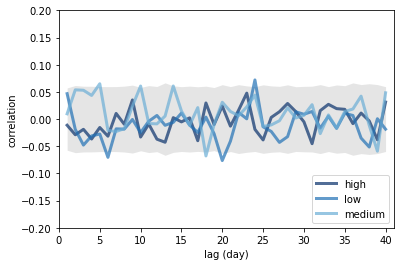

In [46]:
axis = [0, 41, -0.2, 0.2]

PlotAutoCorrelation(dailies, add_weekly=False)
thinkplot.Config(axis=axis, 
                     loc='lower right',
                     ylabel='correlation',
                     xlabel='lag (day)')

Here's what it would look like if there were a weekly cycle.

C:\Users\patwea\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\patwea\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\patwea\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

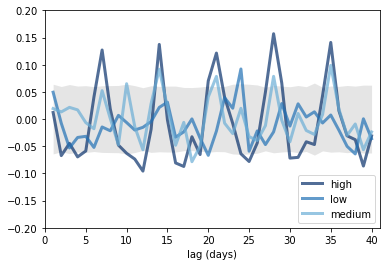

In [47]:
PlotAutoCorrelation(dailies, add_weekly=True)
thinkplot.Config(axis=axis,
                 loc='lower right',
                 xlabel='lag (days)')

## Prediction

The simplest way to generate predictions is to use `statsmodels` to fit a model to the data, then use the `predict` method from the results.

In [48]:
def GenerateSimplePrediction(results, years):
    """Generates a simple prediction.

    results: results object
    years: sequence of times (in years) to make predictions for

    returns: sequence of predicted values
    """
    n = len(years)
    inter = np.ones(n)
    d = dict(Intercept=inter, years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    predict = results.predict(predict_df)
    return predict

In [49]:
def PlotSimplePrediction(results, years):
    predict = GenerateSimplePrediction(results, years)

    thinkplot.Scatter(daily.years, daily.ppg, alpha=0.2, label=name)
    thinkplot.plot(years, predict, color='#ff7f00')
    xlim = years[0]-0.1, years[-1]+0.1
    thinkplot.Config(title='Predictions',
                 xlabel='Years',
                 xlim=xlim,
                 ylabel='Price per gram ($)',
                 loc='upper right')

Here's what the prediction looks like for the high quality category, using the linear model.

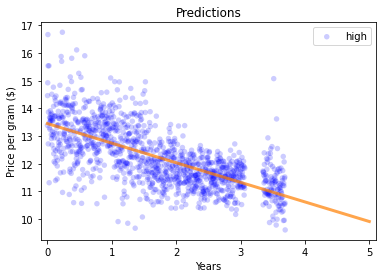

In [50]:
name = 'high'
daily = dailies[name]

_, results = RunLinearModel(daily)
years = np.linspace(0, 5, 101)
PlotSimplePrediction(results, years)

When we generate predictions, we want to quatify the uncertainty in the prediction.  We can do that by resampling.  The following function fits a model to the data, computes residuals, then resamples from the residuals to general fake datasets.  It fits the same model to each fake dataset and returns a list of results.

In [51]:
def SimulateResults(daily, iters=101, func=RunLinearModel):
    """Run simulations based on resampling residuals.

    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data

    returns: list of result objects
    """
    _, results = func(daily)
    fake = daily.copy()
    
    result_seq = []
    for _ in range(iters):
        fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)

    return result_seq

To generate predictions, we take the list of results fitted to resampled data.  For each model, we use the `predict` method to generate predictions, and return a sequence of predictions.

If `add_resid` is true, we add resampled residuals to the predicted values, which generates predictions that include predictive uncertainty (due to random noise) as well as modeling uncertainty (due to random sampling).

In [52]:
def GeneratePredictions(result_seq, years, add_resid=False):
    """Generates an array of predicted values from a list of model results.

    When add_resid is False, predictions represent sampling error only.

    When add_resid is True, they also include residual error (which is
    more relevant to prediction).
    
    result_seq: list of model results
    years: sequence of times (in years) to make predictions for
    add_resid: boolean, whether to add in resampled residuals

    returns: sequence of predictions
    """
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    
    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)

    return predict_seq

To visualize predictions, I show a darker region that quantifies modeling uncertainty and a lighter region that quantifies predictive uncertainty.

In [53]:
def PlotPredictions(daily, years, iters=101, percent=90, func=RunLinearModel):
    """Plots predictions.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateResults(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100-p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color='gray')

    predict_seq = GeneratePredictions(result_seq, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color='gray')

Here are the results for the high quality category.

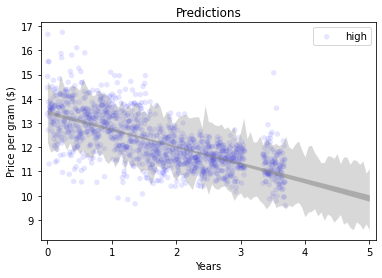

In [54]:
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years)
xlim = years[0]-0.1, years[-1]+0.1
thinkplot.Config(title='Predictions',
                   xlabel='Years',
                   xlim=xlim,
                   ylabel='Price per gram ($)')

But there is one more source of uncertainty: how much past data should we use to build the model?

The following function generates a sequence of models based on different amounts of past data.

In [55]:
def SimulateIntervals(daily, iters=101, func=RunLinearModel):
    """Run simulations based on different subsets of the data.

    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data

    returns: list of result objects
    """
    result_seq = []
    starts = np.linspace(0, len(daily), iters).astype(int)

    for start in starts[:-2]:
        subset = daily[start:]
        _, results = func(subset)
        fake = subset.copy()

        for _ in range(iters):
            fake.ppg = (results.fittedvalues + 
                        thinkstats2.Resample(results.resid))
            _, fake_results = func(fake)
            result_seq.append(fake_results)

    return result_seq

And this function plots the results.

In [56]:
def PlotIntervals(daily, years, iters=101, percent=90, func=RunLinearModel):
    """Plots predictions based on different intervals.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateIntervals(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100-p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.2, color='gray')

Here's what the high quality category looks like if we take into account uncertainty about how much past data to use.

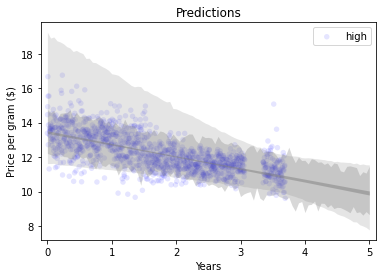

In [57]:
name = 'high'
daily = dailies[name]

thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotIntervals(daily, years)
PlotPredictions(daily, years)
xlim = years[0]-0.1, years[-1]+0.1
thinkplot.Config(title='Predictions',
                 xlabel='Years',
                 xlim=xlim,
                 ylabel='Price per gram ($)')

## Exercises

**Exercise:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [58]:
# Solution

def RunQuadraticModel(daily):
    """Runs a linear model of prices versus years.

    daily: DataFrame of daily prices

    returns: model, results
    """
    daily['years2'] = daily.years**2
    model = smf.ols('ppg ~ years + years2', data=daily)
    results = model.fit()
    return model, results

In [59]:
# Solution

name = 'high'
daily = dailies[name]

model, results = RunQuadraticModel(daily)
results.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          4.57e-164
Time:                        22:50:54   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
years2         0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

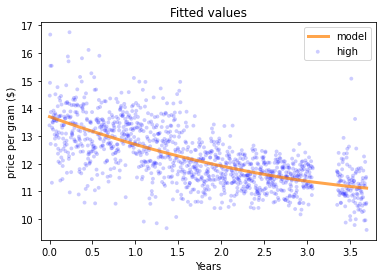

In [60]:
# Solution

PlotFittedValues(model, results, label=name)
thinkplot.Config(title='Fitted values',
                 xlabel='Years',
                 xlim=[-0.1, 3.8],
                 ylabel='price per gram ($)')

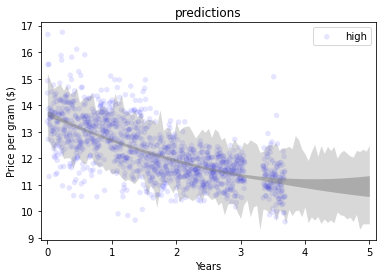

In [61]:
# Solution

years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(title='predictions',
                 xlabel='Years',
                 xlim=[years[0]-0.1, years[-1]+0.1],
                 ylabel='Price per gram ($)')

**Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [62]:
# Solution

class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [63]:
# Solution

# test the correlation between consecutive prices

name = 'high'
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.4852293761947381 0.0


In [64]:
# Solution

# test for serial correlation in residuals of the linear model

_, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)    

0.07570473767506261 0.004


In [65]:
# Solution

# test for serial correlation in residuals of the quadratic model

_, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.05607308161289916 0.062


**Worked example:** There are several ways to extend the EWMA model to generate predictions. One of the simplest is something like this:

1. Compute the EWMA of the time series and use the last point as an intercept, `inter`.

2. Compute the EWMA of differences between successive elements in the time series and use the last point as a slope, `slope`.

3. To predict values at future times, compute `inter + slope * dt`, where `dt` is the difference between the time of the prediction and the time of the last observation.


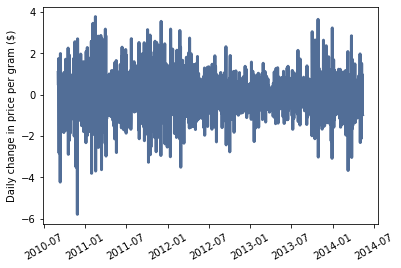

In [66]:
name = 'high'
daily = dailies[name]

filled = FillMissing(daily)
diffs = filled.ppg.diff()

thinkplot.plot(diffs)
plt.xticks(rotation=30)
thinkplot.Config(ylabel='Daily change in price per gram ($)')

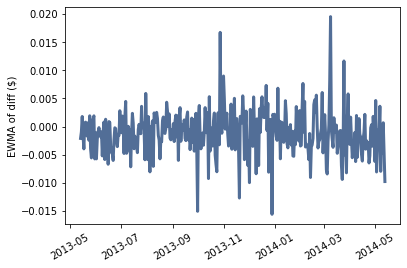

In [67]:
filled['slope'] = diffs.ewm(span=365).mean()
thinkplot.plot(filled.slope[-365:])
plt.xticks(rotation=30)
thinkplot.Config(ylabel='EWMA of diff ($)')

In [68]:
# extract the last inter and the mean of the last 30 slopes
start = filled.index[-1]
inter = filled.ewma[-1]
slope = filled.slope[-30:].mean()

start, inter, slope

(Timestamp('2014-05-13 00:00:00', freq='D'),
 10.93058413472032,
 -0.0026459749849530975)

In [69]:
# reindex the DataFrame, adding a year to the end
dates = pd.date_range(filled.index.min(), 
                      filled.index.max() + np.timedelta64(365, 'D'))
predicted = filled.reindex(dates)

In [70]:
# generate predicted values and add them to the end
predicted['date'] = predicted.index
one_day = np.timedelta64(1, 'D')
predicted['days'] = (predicted.date - start) / one_day
predict = inter + slope * predicted.days
predicted.ewma.fillna(predict, inplace=True)

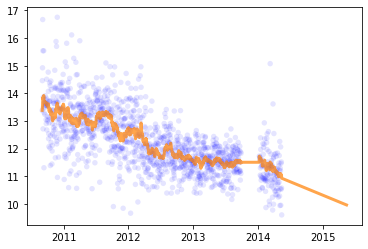

In [71]:
# plot the actual values and predictions
thinkplot.Scatter(daily.ppg, alpha=0.1, label=name)
thinkplot.Plot(predicted.ewma, color='#ff7f00')

As an exercise, run this analysis again for the other quality categories.

<br><br>

## Exercise 12-1

## Importing packages

In [147]:
import os

# changing working directory to ThinkStats2/code folder
path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University\\DSC 530 - Data Exploration and Analysis\\ThinkStats2\\code'
os.chdir(path)

%matplotlib inline

import thinkstats2 as ts2
import thinkplot as tp
import nsfg
import brfss
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import bisect
import scipy as sp
from matplotlib.offsetbox import (AnchoredOffsetbox, TextArea)
import math
import first
from sklearn import linear_model as skl_lm
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as smtsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



***
***


<br><br>

## Practice

In [123]:
tx = pd.read_csv('mj-clean.csv', parse_dates=[5])

tx

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983
...,...,...,...,...,...,...,...,...,...,...
147065,West Palm Beach,FL,140,28.300,high,2014-05-13,4.95,Florida,26.669744,-80.127040
147066,Wilmington,OH,30,3.540,medium,2014-05-13,8.47,Ohio,39.463476,-83.844460
147067,Youngstown,OH,100,10.000,medium,2014-05-13,10.00,Ohio,41.086279,-80.664670
147068,Ypsilanti,MI,35,3.540,medium,2014-05-13,9.89,Michigan,42.235260,-83.607655


In [124]:
tx2 = tx[['quality','date','ppg']]

group_df = GroupDF(df=tx2, grp_cols=['quality','date'], func_cols='ppg', func=np.mean)

min_date = group_df['date'].min()

group_df['days_from_start'] = TimeDelta(min_date, group_df['date'], 'D')

group_df

,quality,date,ppg,days_from_start
0,high,2010-09-02,13.384186,0.0
1,high,2010-09-03,14.459588,1.0
2,high,2010-09-04,14.923333,2.0
3,high,2010-09-05,16.667500,3.0
4,high,2010-09-06,15.537500,4.0
...,...,...,...,...
3653,medium,2014-05-09,9.037059,1345.0
3654,medium,2014-05-10,9.155686,1346.0
3655,medium,2014-05-11,8.138214,1347.0
3656,medium,2014-05-12,8.959655,1348.0


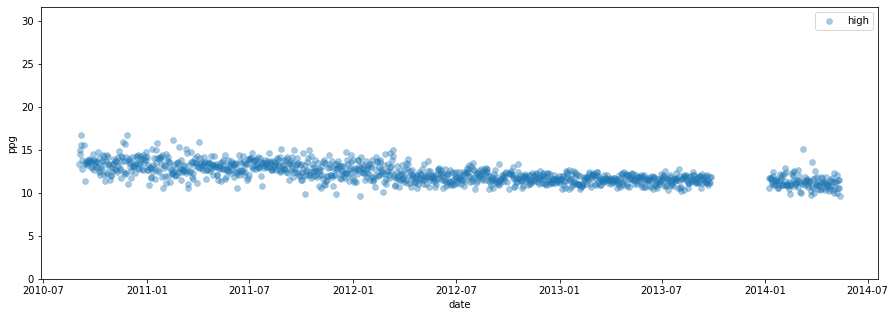

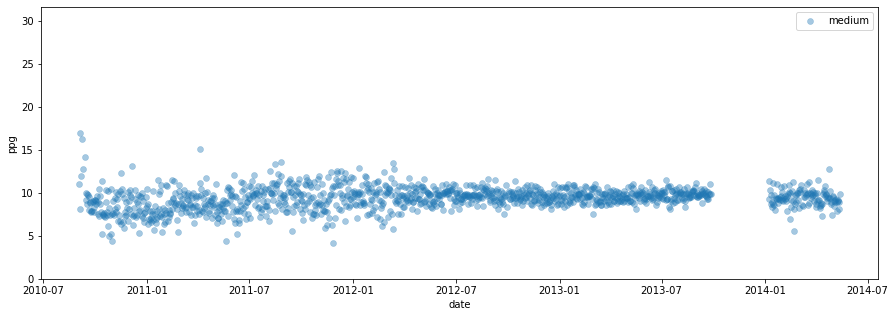

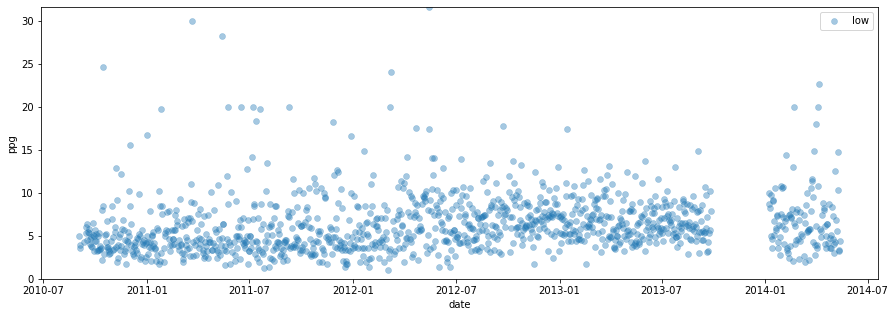

In [125]:
grp_lst = ['high','medium','low']

for grp_name in grp_lst:
    fig = plt.figure(figsize=(15,5))
    sns.scatterplot(data=group_df[group_df['quality']==grp_name], x='date', y='ppg', edgecolor=None, alpha=.4, label=grp_name)
    plt.ylim(0, group_df['ppg'].max())
    plt.legend()
    plt.show()

~~~~~~~~~~~~~~~
Quality: high
~~~~~~~~~~~~~~~
                            OLS Regression Results                            
Dep. Variable:                    ppg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     989.7
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          3.69e-160
Time:                        21:23:43   Log-Likelihood:                -1510.1
No. Observations:                1241   AIC:                             3024.
Df Residuals:                    1239   BIC:                             3035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

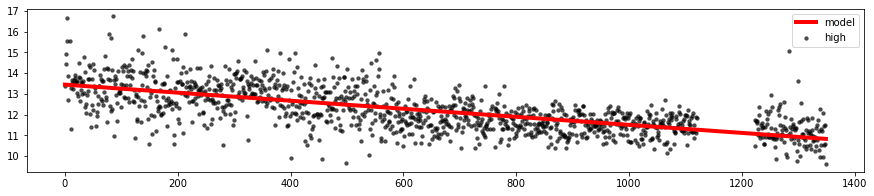

~~~~~~~~~~~~~~~
Quality: medium
~~~~~~~~~~~~~~~
                            OLS Regression Results                            
Dep. Variable:                    ppg   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     64.92
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.82e-15
Time:                        21:23:43   Log-Likelihood:                -2053.9
No. Observations:                1238   AIC:                             4112.
Df Residuals:                    1236   BIC:                             4122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

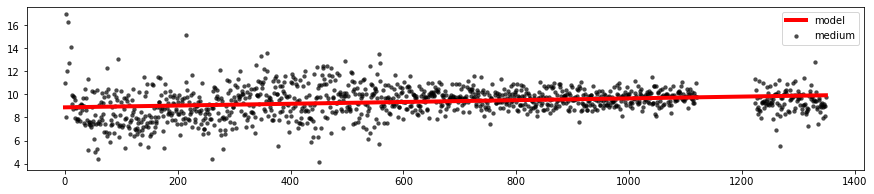

~~~~~~~~~~~~~~~
Quality: low
~~~~~~~~~~~~~~~
                            OLS Regression Results                            
Dep. Variable:                    ppg   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     35.90
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           2.76e-09
Time:                        21:23:44   Log-Likelihood:                -3091.3
No. Observations:                1179   AIC:                             6187.
Df Residuals:                    1177   BIC:                             6197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

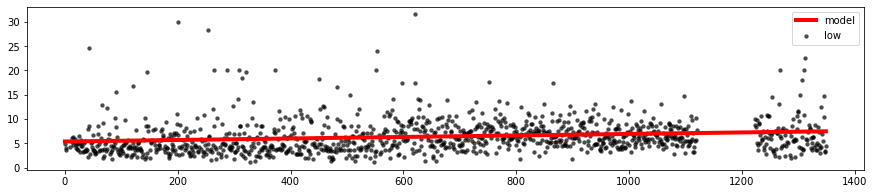

In [126]:
grp_lst = ['high','medium','low']

for grp_name in grp_lst:
    sep = '~'
    df = group_df[group_df['quality']==grp_name]
    model, results = sm_lm(df=df, outcome_var='ppg', predictor_vars='days_from_start')
    print(f"{sep*15}\nQuality: {grp_name}\n{sep*15}")
    print(f"{results.summary()}\n\n\n")
    sm_lm_plot(model=model, results=results, label=grp_name, figsize=(15,3), plot_alpha=.7, linewidth=4)
    

<br>

## Why Linear Model is Bad for Time Analysis

- First, there is no reason to expect the long-term trend to be a line or any other simple function. In general, prices are determined by supply and demand, both of which vary over time in unpredictable ways. 
- Second, the linear regression model gives equal weight to all data, recent and past. For purposes of prediction, we should probably give more weight to recent data. 
- Finally, one of the assumptions of linear regression is that the residuals are uncorrelated noise. With time series data, this assumption is often false because successive values are correlated.

Downey, Allen B.. Think Stats: Exploratory Data Analysis (p. 208). O'Reilly Media. Kindle Edition. 

## Better Solution - Rolling Average

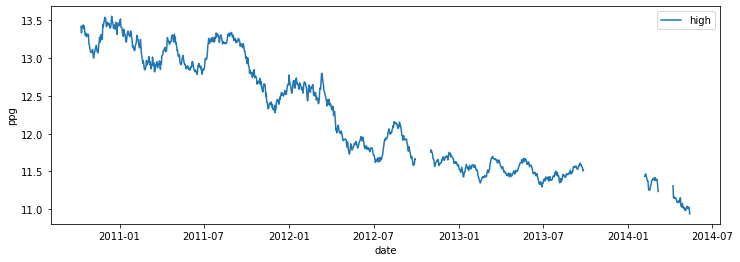

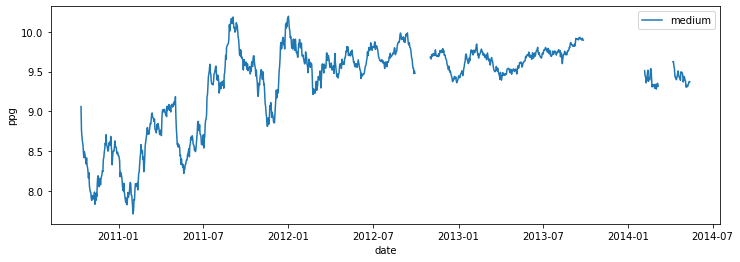

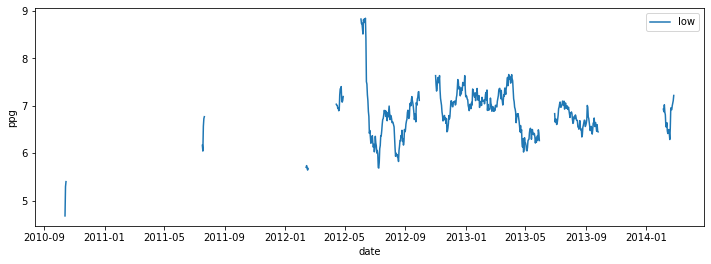

In [127]:
## get all dates between start and end dates
all_dates = pd.DataFrame(pd.date_range(group_df.date.min(), group_df.date.max()), columns=['date'])

grp_lst = ['high','medium','low']

for grp_name in grp_lst:
    fig = plt.figure(figsize=(12,4))
    
    ## left join from all dates df to missing dates df
    df = all_dates.merge(group_df[group_df.quality==grp_name], how='left', on='date')
    roll_mean = df.rolling(window=30, on='date').mean()
    sns.lineplot(x=roll_mean['date'], y=roll_mean['ppg'], label=grp_name)
    plt.legend()
    plt.show()


<br>

### Using EWMA (exponentially-weighted moving average)

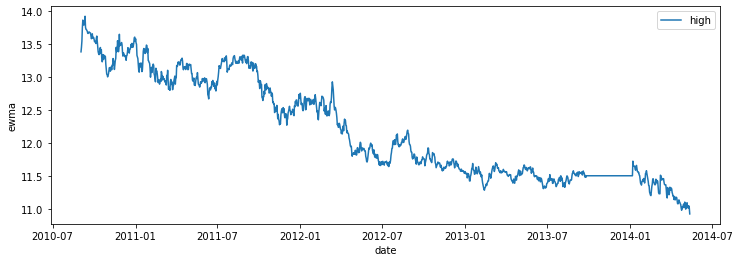

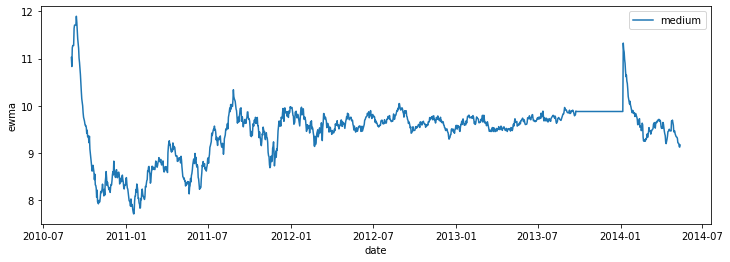

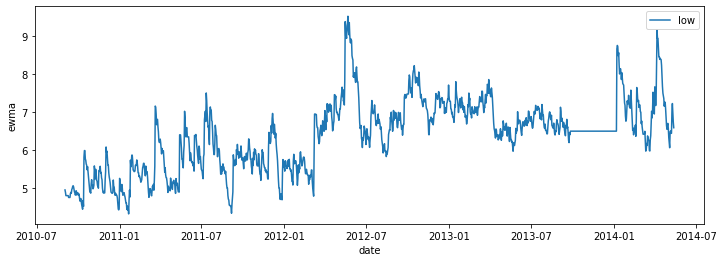

In [128]:
## get all dates between start and end dates
all_dates = pd.DataFrame(pd.date_range(group_df.date.min(), group_df.date.max()), columns=['date'])

grp_lst = ['high','medium','low']

for grp_name in grp_lst:
    fig = plt.figure(figsize=(12,4))
    
    ## left join from all dates df to missing dates df
    col_name = 'ewma'
    df = all_dates.merge(group_df[group_df.quality==grp_name], how='left', on='date').sort_values(by='date').reset_index(drop=True)
    df[col_name] = df.ppg.ewm(span=30, adjust=False).mean()
    sns.lineplot(x=df.date, y=df[col_name], label=grp_name)
    plt.legend()
    plt.show()
    

<br><br>

### Filling Missing Values with EWMA

Simple and common method is to fill the nan values with the related ewma for that value.

<ipython-input-129-d56d3a258033>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df['ewma'] = high_df.ppg.ewm(span=30, adjust=False).mean()
C:\Users\patwea\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


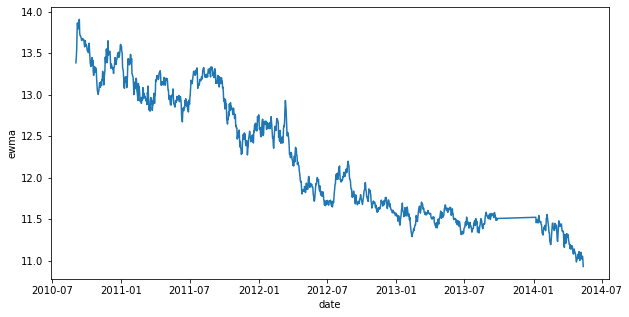

In [129]:
## get all dates between start and end dates
all_dates = pd.DataFrame(pd.date_range(group_df.date.min(), group_df.date.max()), columns=['date'])

## new DataFrame with no missing dates. Values though will be nan
df = all_dates.merge(group_df, how='left', on='date').sort_values(by='date').reset_index(drop=True)

high_df = df[df.quality=='high']

high_df['ewma'] = high_df.ppg.ewm(span=30, adjust=False).mean()

high_df.ppg.fillna(high_df.ewma, inplace=True)

plt.figure(figsize=(10,5))
sns.lineplot(x=high_df.date, y=high_df.ewma)
plt.show()

<br>


Caveat to the above method is that it understates the noise in the series. This can be solved by going one step further than the above method by instead getting the residuals for each valaue - it's ewma. Then randomly selecting from the residuals for each nan row and then adding that random residual to the ewma for the row.

<ipython-input-130-7a4c7ec30f23>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df['ewma'] = high_df.ppg.ewm(span=30, adjust=False).mean()
<ipython-input-130-7a4c7ec30f23>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df['rand_resid'] = high_df.ewma + np.random.choice(resids, len(high_df))
C:\Users\patwea\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

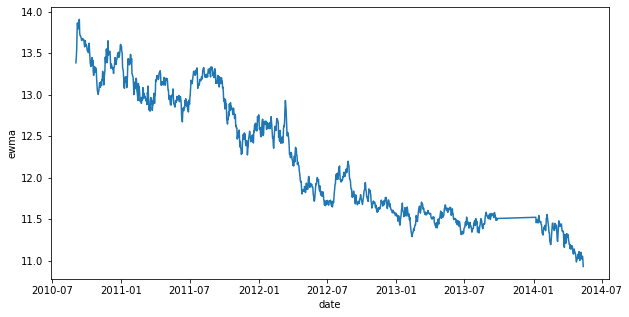

In [130]:
## get all dates between start and end dates
all_dates = pd.DataFrame(pd.date_range(group_df.date.min(), group_df.date.max()), columns=['date'])

## new DataFrame with no missing dates. Values though will be nan
df = all_dates.merge(group_df, how='left', on='date').sort_values(by='date').reset_index(drop=True)

high_df = df[df.quality=='high']

high_df['ewma'] = high_df.ppg.ewm(span=30, adjust=False).mean()

resids = (high_df.ppg - high_df.ewma).dropna()

high_df['rand_resid'] = high_df.ewma + np.random.choice(resids, len(high_df))

high_df.ppg.fillna(high_df.rand_resid, inplace=True)

high_df

plt.figure(figsize=(10,5))
sns.lineplot(x=high_df.date, y=high_df.ewma)
plt.show()

<br><br>

### Serial Correlation

When a value is related to the next value in the series. For example, in time series analysis, if a value is low on Monday but higher on Tuesday and then higher on Wednesday.

In [131]:
def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    
    corr = sp.stats.pearsonr(xs, ys)[0]
    return corr

In [132]:
## serial correlation on raw data

## get all dates between start and end dates
all_dates = pd.DataFrame(pd.date_range(group_df.date.min(), group_df.date.max()), columns=['date'])

## new DataFrame with no missing dates. Values though will be nan
df = all_dates.merge(group_df, how='left', on='date').sort_values(by='date').reset_index(drop=True)

high_df = df[df.quality=='high']

SerialCorr(high_df.ppg)

0.4852293761947378

<br>

See if there is correlation in value if trend is removed. This is done by calculating the ewma and then subtracting it from the value.

In [133]:
## serial correlation of residual of value and ewma
## get all dates between start and end dates
all_dates = pd.DataFrame(pd.date_range(group_df.date.min(), group_df.date.max()), columns=['date'])

## new DataFrame with no missing dates. Values though will be nan
df = all_dates.merge(group_df, how='left', on='date').sort_values(by='date').reset_index(drop=True)

high_df = df[df.quality=='high']

high_df['ewma'] = high_df.ppg.ewm(span=30, adjust=False).mean()

resids = high_df['ppg'] - high_df['ewma']

SerialCorr(resids)

<ipython-input-133-5fe64285c5f2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df['ewma'] = high_df.ppg.ewm(span=30, adjust=False).mean()


-0.008719615867201148

<br><br>

### Autocorrelation Function with Statsmodels

Tests multiple different lags very easily.

In [134]:
## get all dates between start and end dates
all_dates = pd.DataFrame(pd.date_range(group_df.date.min(), group_df.date.max()), columns=['date'])

## new DataFrame with no missing dates. Values though will be nan
df = all_dates.merge(group_df, how='left', on='date').sort_values(by='date').reset_index(drop=True)

high_df = df[df.quality=='high']

high_df['ewma'] = high_df.ppg.ewm(span=30, adjust=False).mean()

resids = (high_df.ppg - high_df.ewma).dropna()

high_df['rand_resid'] = high_df.ewma + np.random.choice(resids, len(high_df))

high_df.ppg.fillna(high_df.rand_resid, inplace=True)


## statsmodels auto correlation function acf()
auto_corr = smtsa.acf(high_df.ppg, nlags=365, unbiased=True)
auto_corr

<ipython-input-134-7a0bb58942d6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df['ewma'] = high_df.ppg.ewm(span=30, adjust=False).mean()
<ipython-input-134-7a0bb58942d6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df['rand_resid'] = high_df.ewma + np.random.choice(resids, len(high_df))
C:\Users\patwea\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

array([1.        , 0.4842812 , 0.46406048, 0.47820608, 0.45516392,
       0.46247141, 0.4564456 , 0.47659018, 0.46971035, 0.48592078,
       0.44787437, 0.45640667, 0.44688823, 0.43698392, 0.46553625,
       0.46471856, 0.46811309, 0.43678532, 0.46752698, 0.44380372,
       0.47341206, 0.44910653, 0.45978643, 0.46662055, 0.44352608,
       0.43379432, 0.45626219, 0.45051171, 0.45619081, 0.46575999,
       0.4483758 , 0.41326607, 0.44289533, 0.44863946, 0.44070903,
       0.45081881, 0.4399718 , 0.44734622, 0.43775143, 0.41757367,
       0.44376494, 0.3956496 , 0.42649526, 0.4228876 , 0.40295282,
       0.41873808, 0.43285758, 0.41678228, 0.40549727, 0.41844268,
       0.4115964 , 0.44086381, 0.42747792, 0.42227064, 0.42925745,
       0.42400624, 0.44366458, 0.44828749, 0.39180679, 0.38557899,
       0.4402416 , 0.40726967, 0.43199443, 0.4164172 , 0.395538  ,
       0.40696691, 0.40226642, 0.44041748, 0.41046808, 0.42207295,
       0.41472209, 0.42108046, 0.42416593, 0.40830467, 0.40575

In [135]:
txt_df = pd.read_csv('ice_cream.csv')

ic_df = txt_df

ic_df

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [136]:
## rename columns
ic_df.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [137]:
## set date as datetime and not string
ic_df['date'] = pd.to_datetime(ic_df.date)

In [138]:
## set date as the index
ic_df.set_index('date', inplace=True)

In [142]:
## only get results from 2010 onwards
start = pd.to_datetime('2010-01-01')
ic_df = ic_df[start:]
ic_df

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


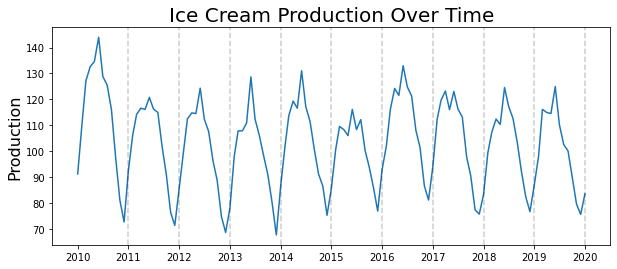

In [146]:
## plot the DataFrame
plt.figure(figsize=(10,4))
plt.plot(ic_df.production)
plt.title('Ice Cream Production Over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=.2)

<br>

### Auto-Correlation Function Plot w/Statsmodels

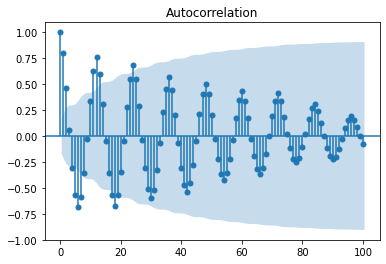

In [148]:
acf_plot = plot_acf(ic_df.production, lags=100)

*Seeing the decay in the ACF plot, we are likely dealing with an Auto Regressive process.*

<br><br>

### Partial Auto-Correlation Function w/Statsmodels

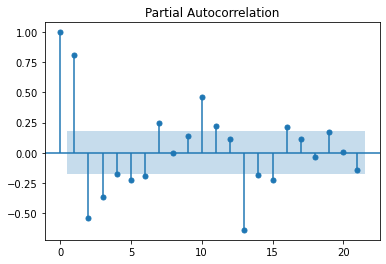

In [149]:
pacf_plot = plot_pacf(ic_df.production)

*Based on PACF, we should maybe start with an Auto Regressive model with lags 1,2,3,10,13*

In [153]:
import quandl

tesla = quandl.get('WIKI/TSLA')
gm = quandl.get('WIKI/GM')

In [155]:
tesla

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0
2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0
2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0


In [156]:
gm

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.890,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.110,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.810,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.190,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.220,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,37.16,38.02,37.100,37.58,11412099.0,0.0,1.0,37.160000,38.020000,37.100000,37.580000,11412099.0
2018-03-22,37.23,37.33,36.270,36.35,12455805.0,0.0,1.0,37.230000,37.330000,36.270000,36.350000,12455805.0
2018-03-23,36.42,36.59,35.130,35.17,12939065.0,0.0,1.0,36.420000,36.590000,35.130000,35.170000,12939065.0
